In [2]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
import string

In [4]:
ms = pd.read_csv('combined_MS.csv')

In [5]:
dc = pd.read_csv('combined_DC.csv')

In [22]:
# Create a 'Target' column with values 1 for 'ms' DataFrame
ms['Target'] = 1

In [23]:
# Create a 'Target' column with values 0 for 'dc' DataFrame
dc['Target'] = 0

In [38]:
final = pd.concat([ms, dc], ignore_index=True)

In [40]:
final.Target.value_counts()

0    3357
1    3322
Name: Target, dtype: int64

In [41]:
final.to_csv('updated_combined_FINAL.csv', index=False)

In [38]:
final = pd.read_csv('updated_combined_FINAL.csv')

In [45]:
final.head()

,Title,Author,Score,URL,Created,Selftext,Target
0,Secret Invasion S01E06 - Discussion Thread,steve32767,1405,https://www.reddit.com/r/marvelstudios/comment...,1.690354e+09,Welcome back everyone.\n\nThis thread is for d...,1
1,Official Poster for ‘Loki’ Season 2,MarvelsGrantMan136,1860,https://i.redd.it/yw2vfpcslreb1.jpg,1.690576e+09,NaN,1
2,Speaking of Marvel's lack of tying up loose en...,NiteAngyl,2738,https://i.redd.it/85awkp1ofpeb1.jpg,1.690550e+09,NaN,1
3,How The Harvest should've been stored.,here_i_am_here,1680,https://i.redd.it/cwetvdu48peb1.jpg,1.690547e+09,Absolutely bonkers that it's all just mixed in...,1
4,"With Secret Invasion Done, How Would You Rank ...",-Darkslayer,747,https://i.redd.it/g0xoxwt31qeb1.jpg,1.690557e+09,NaN,1


In [47]:
final.columns

Index(['Title', 'Author', 'Score', 'URL', 'Created', 'Selftext', 'Target'], dtype='object')

In [62]:
final.isnull().sum().T

Title          0
Author         0
Score          0
URL            0
Created        0
Selftext    2496
Target         0
dtype: int64

In [68]:
final['Selftext'].fillna('', inplace=True)

In [71]:
# Cleaning and replacing the NaN with empty strings 
final.isnull().sum().T

Title       0
Author      0
Score       0
URL         0
Created     0
Selftext    0
Target      0
dtype: int64

In [11]:
# list of all columns with >3,000 null values
cols_to_drop = []
for col in final.columns:
    if final[col].isnull().sum() > 3000:
        cols_to_drop.append(col)
cols_to_drop

[]

In [51]:
# Score ie (popularity of post) might be valuable
final['Score'].value_counts()

0       1749
1        413
2        329
3        242
4        190
        ... 
2699       1
681        1
6602       1
1296       1
355        1
Name: Score, Length: 1035, dtype: int64

In [66]:
# drop any duplicated posts

In [74]:
final = final.drop_duplicates(subset = ['Selftext'])

In [53]:
print(final.info())
print(final.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4381 entries, 0 to 6678
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     4381 non-null   object 
 1   Author    4381 non-null   object 
 2   Score     4381 non-null   int64  
 3   URL       4381 non-null   object 
 4   Created   4381 non-null   float64
 5   Selftext  4381 non-null   object 
 6   Target    4381 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 273.8+ KB
None
              Score       Created       Target
count   4381.000000  4.381000e+03  4381.000000
mean     374.797763  1.690169e+09     0.509929
std     1024.397654  3.817507e+05     0.499958
min        0.000000  1.687532e+09     0.000000
25%        3.000000  1.689861e+09     0.000000
50%       24.000000  1.690207e+09     1.000000
75%      207.000000  1.690508e+09     1.000000
max    11872.000000  1.690837e+09     1.000000


## Exploratory Analysis

In [17]:
# Looks like Marvel and DC subreddits both of a solid distribution of posts.

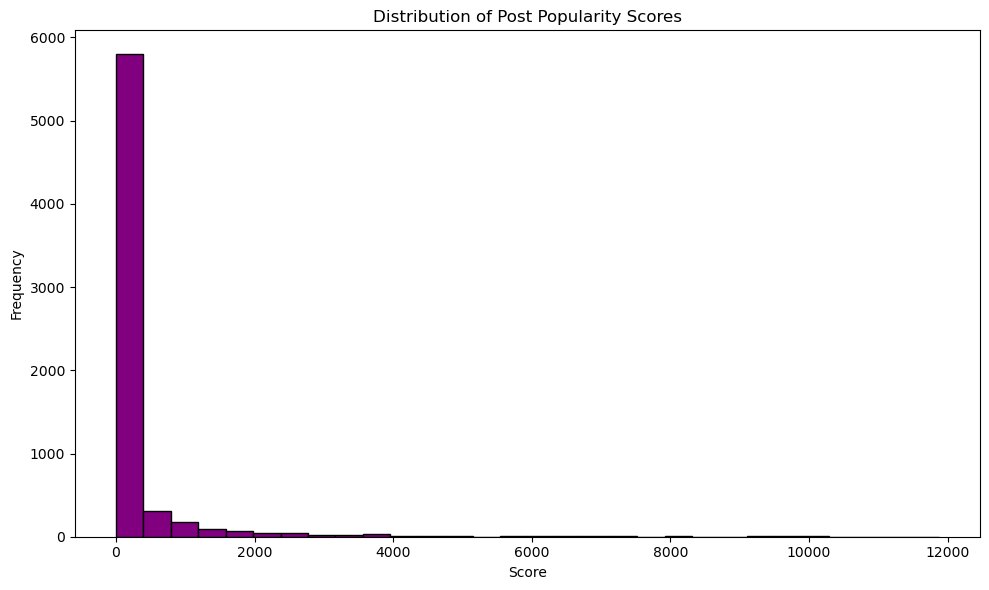

In [49]:
plt.figure(figsize=(10, 6))
plt.hist(final['Score'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Post Popularity Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [56]:
ms_texts_count = len(ms['Selftext'])
dc_texts_count = len(dc['Selftext'])

print("Number of 'Selftext' texts in Marvel Subbreddit (ms):", ms_texts_count)
print("Number of 'Selftext' texts in DcComics Subreddit(dc):", dc_texts_count)


Number of 'Selftext' texts in Marvel Subbreddit (ms): 3322
Number of 'Selftext' texts in DcComics Subreddit(dc): 3357


#### Looks like we a a fairly good distribution between the amount of self texts in each column, so one wouldn't out weight the other

### Before we vectorize the text, we might look at the lengths and word counts

In [51]:
ms['status_length'] = ms['Selftext'].str.len()
ms['status_word_count'] = ms['Selftext'].str.split().str.len()

dc['status_length'] = dc['Selftext'].str.len()
dc['status_word_count'] = dc['Selftext'].str.split().str.len()

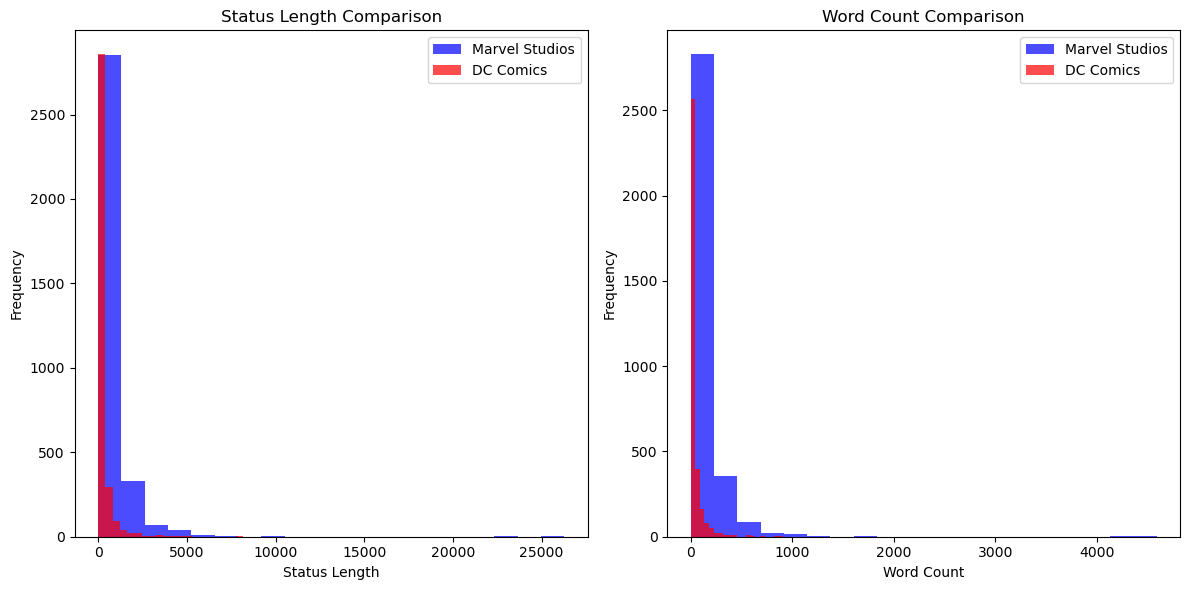

In [55]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(ms['status_length'], bins=20, color='blue', alpha=0.7, label='Marvel Studios')
plt.hist(dc['status_length'], bins=20, color='red', alpha=0.7, label='DC Comics')
plt.xlabel('Status Length')
plt.ylabel('Frequency')
plt.title('Status Length Comparison')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(ms['status_word_count'], bins=20, color='blue', alpha=0.7, label='Marvel Studios')
plt.hist(dc['status_word_count'], bins=20, color='red', alpha=0.7, label='DC Comics')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Word Count Comparison')
plt.legend()

plt.tight_layout()
plt.show()

Based on the histograms above, we can see that the distribution of Status length and word count are quite similar between both subreddits. Although, Marvel seems to have an edge in the amount of posts generated

In [40]:
#New Column called Status Length using Selftext 
final['status_length'] = final['Selftext'].str.len()

In [41]:
final['status_length'].fillna('', inplace=True)

In [42]:
# New column called status_word_count that contains the number of words in post 

In [43]:
final['status_word_count'] = final['Selftext'].str.split().str.len()

In [44]:
final['status_word_count'].fillna('', inplace=True)

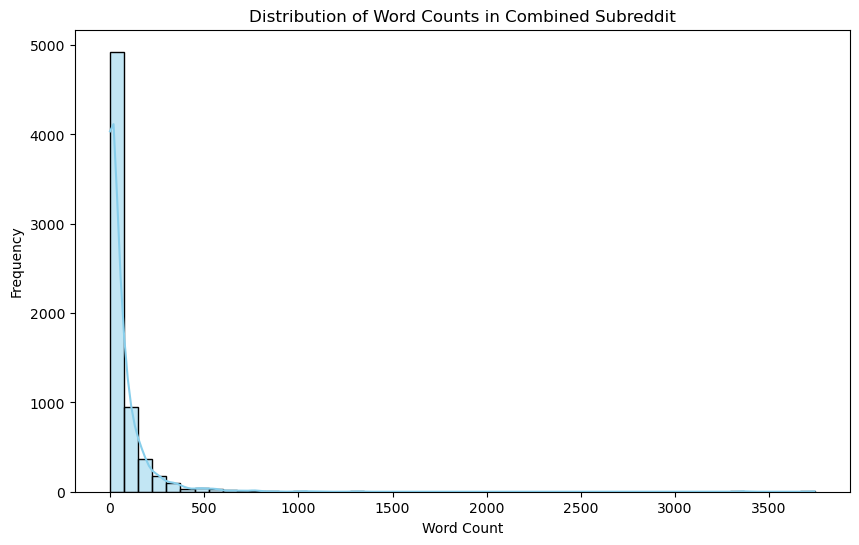

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(final['status_word_count'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Word Counts in Combined Subreddit')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# Most Common Words in both Subreddits

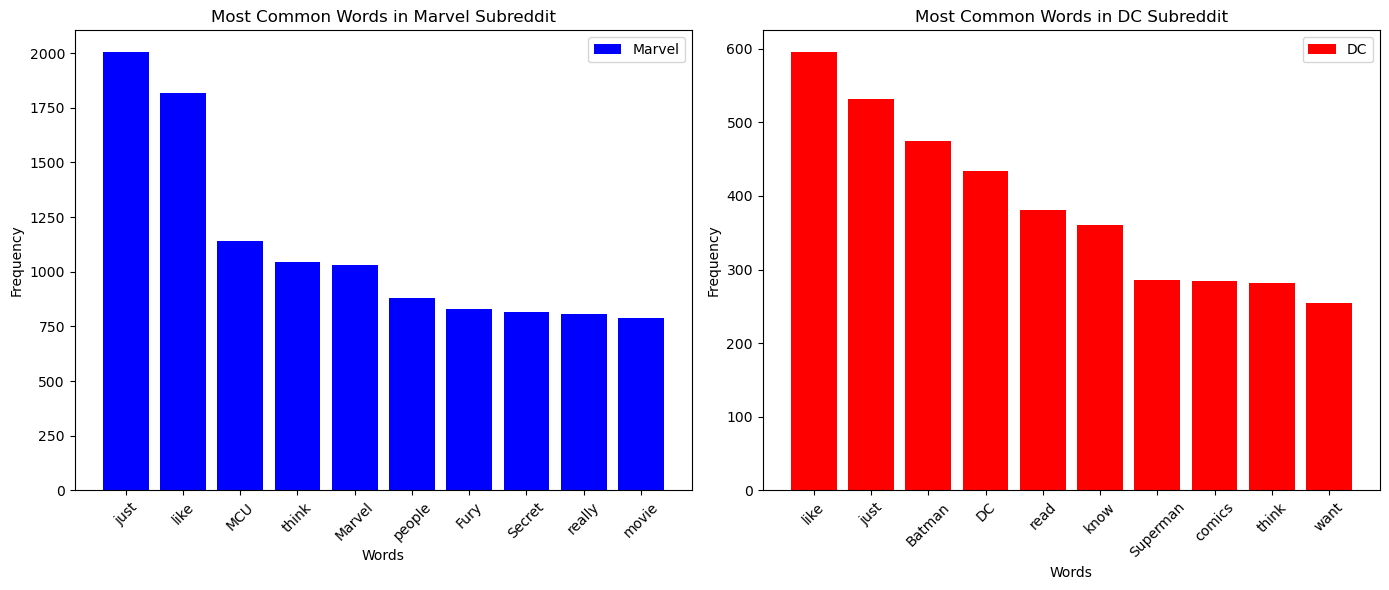

In [36]:
ms_text = ms['Selftext']
dc_text = dc['Selftext']

ms_all_text = ' '.join(str(text) for text in ms_text).split()
dc_all_text = ' '.join(str(text) for text in dc_text if isinstance(text, str)).split()  # Remove NaN values

# Remove common English stop words and random symbols
ms_filtered_words = [word for word in ms_all_text if word.lower() not in ENGLISH_STOP_WORDS and word.isalpha()]
dc_filtered_words = [word for word in dc_all_text if word.lower() not in ENGLISH_STOP_WORDS and word.isalpha()]

ms_word_counts = Counter(ms_filtered_words)
dc_word_counts = Counter(dc_filtered_words)

# most common words for each subreddit
ms_common_words = ms_word_counts.most_common(10)
dc_common_words = dc_word_counts.most_common(10)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

ms_words, ms_counts = zip(*ms_common_words)
ms_bars = axes[0].bar(ms_words, ms_counts, color='blue')
axes[0].set_title('Most Common Words in Marvel Subreddit')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)

dc_words, dc_counts = zip(*dc_common_words)
dc_bars = axes[1].bar(dc_words, dc_counts, color='red')
axes[1].set_title('Most Common Words in DC Subreddit')
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)

axes[0].legend([ms_bars[0]], ['Marvel'], loc='upper right')
axes[1].legend([dc_bars[0]], ['DC'], loc='upper right')

plt.tight_layout()
plt.show()

In [68]:
from nltk.util import bigrams
from collections import Counter

In [70]:
ms_bigrams = list(bigrams(ms_filtered_words))
dc_bigrams = list(bigrams(dc_filtered_words))

# Count the occurrences of each bigram
ms_bigram_counts = Counter(ms_bigrams)
dc_bigram_counts = Counter(dc_bigrams)

# Most common bigrams for each subreddit
ms_common_bigrams = ms_bigram_counts.most_common(10)
dc_common_bigrams = dc_bigram_counts.most_common(10)

# Print the most common bigrams for Marvel subreddit
print("Most Common Bigrams in Marvel Subreddit:")
for bigram, count in ms_common_bigrams:
    print(f"{bigram[0]} {bigram[1]} - {count} occurrences")

print("\n")

# Print the most common bigrams for DC subreddit
print("Most Common Bigrams in DC Subreddit:")
for bigram, count in dc_common_bigrams:
    print(f"{bigram[0]} {bigram[1]} - {count} occurrences")

Most Common Bigrams in Marvel Subreddit:
Secret Invasion - 456 occurrences
Iron Man - 157 occurrences
feel like - 145 occurrences
Captain America - 126 occurrences
Captain Marvel - 115 occurrences
Nick Fury - 108 occurrences
Doctor Strange - 101 occurrences
Guardians Galaxy - 90 occurrences
Black Panther - 81 occurrences
felt like - 79 occurrences


Most Common Bigrams in DC Subreddit:
Justice League - 110 occurrences
Green Lantern - 85 occurrences
Wonder Woman - 56 occurrences
justice league - 42 occurrences
want read - 42 occurrences
feel like - 40 occurrences
reading comics - 34 occurrences
League Season - 32 occurrences
just finished - 30 occurrences
reading order - 28 occurrences


**We see that the Marvel Subreddit includes a lot more occurences than the DC subreddit. Also discussions on current television shows are more prevalent within the Marvel subreddit compared to the DC subreddit. We will explore these bigrams further in the NLP and Modeling**

#### Removing any unnecessary characters, punctuation, and special symbols from combined data

In [20]:
# redundant Selftext 

def cleaner(text):
    # Make lowercase
    text = text.lower()

    # Remove HTML special entities
    text = re.sub(r'\&\w*;', '', text)
    
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)
    
    # Remove punctuation and split 's, 't, 've with a space for filter
    text = re.sub(r'[' + string.punctuation.replace('@', '') + ']+', ' ', text)
    
    # Remove words with 2 or fewer letters
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    # Remove whitespace (including new line characters)
    text = re.sub(r'\s\s+', ' ', text)
    
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    text = ''.join(c for c in text if c <= '\uFFFF') 
    
    return text

In [72]:
final['Selftext'] = final['Selftext'].apply(cleaner)

In [70]:
final.to_csv('updated_combined_FINAL.csv', index=False)

In [59]:
final = pd.read_csv('updated_combined_FINAL.csv')